In [28]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
fruits = pd.read_table('fruit_data_with_colors.txt')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [29]:
print(fruits.shape)

(59, 7)


In [30]:
print(fruits['fruit_name'].unique())

['apple' 'mandarin' 'orange' 'lemon']


In [31]:
print(fruits.groupby('fruit_name').size())

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

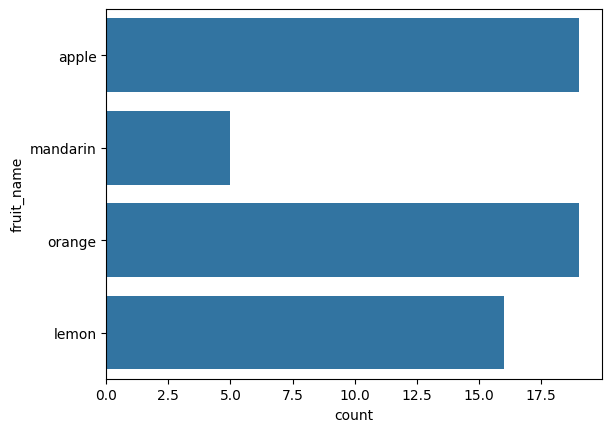

In [32]:
import seaborn as sns
sns.countplot(fruits['fruit_name'],label="Count")
plt.show

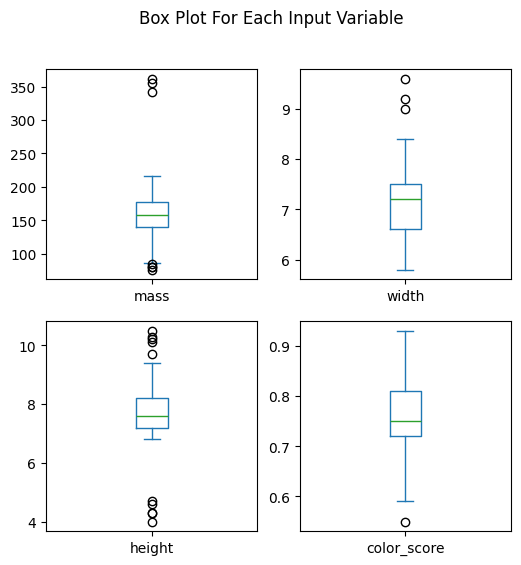

In [33]:
fruits.drop('fruit_label', axis=1).plot(
    kind='box',
    subplots=True,
    layout=(2, 2),
    sharex=False,
    sharey=False,
    figsize=(6,6),  # Corrected: use a tuple with parentheses
    title='Box Plot For Each Input Variable'
)
plt.savefig('fruits_boxfig')
plt.show()

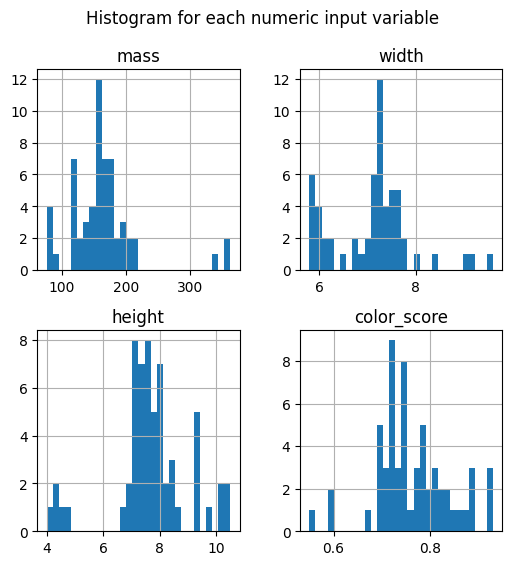

In [34]:
import pylab as pl
fruits.drop('fruit_label' ,axis=1).hist(bins=30, figsize=(6,6))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('fruits_hist')
plt.show()

In [39]:
###Scatter matrix

C:\Users\Izzah Alia\AppData\Local\Temp\ipykernel_14468\607671189.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('gnuplot')


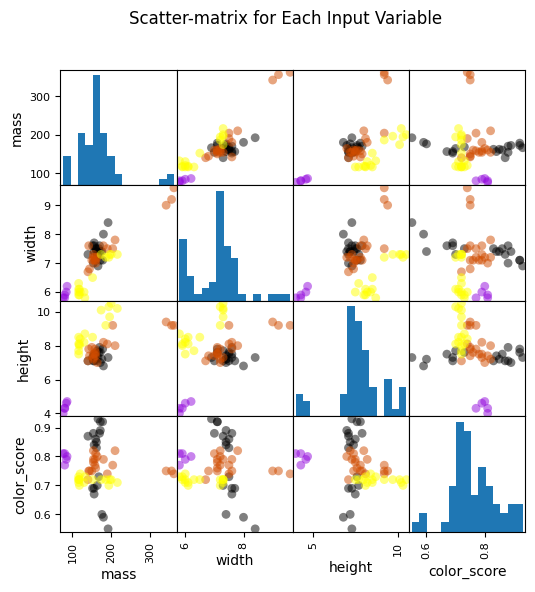

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix  # Corrected import
from matplotlib import cm

feature_names = ['mass', 'width', 'height', 'color_score']
X = fruits[feature_names]
y = fruits['fruit_label']

cmap = cm.get_cmap('gnuplot')

scatter = scatter_matrix(X, c=y, marker='o', s=40, hist_kwds={'bins': 15}, figsize=(6, 6), cmap=cmap)

plt.suptitle('Scatter-matrix for Each Input Variable')

plt.savefig('fruits_scatter_matrix.png')  # Added file extension for clarity
plt.show()

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
### LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression() 
logreg.fit(X_train, y_train)

# Print accuracy on training and test sets
print('Accuracy on training set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy on training set: 0.75
Accuracy on test set: 0.47


In [50]:
### DECISION TREE

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train,y_train)

# Print accuracy on training and test sets
print('Accuracy on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.87


In [51]:
### K-NEAREST NEIGHBORS

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

# Print accuracy on training and test sets
print('Accuracy on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy on training set: 0.95
Accuracy on test set: 1.00


In [52]:
### GAUSSION NAIVE BAYES

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train,y_train)

# Print accuracy on training and test sets
print('Accuracy on training set: {:.2f}'.format(gnb.score(X_train, y_train)))
print('Accuracy on test set: {:.2f}'.format(gnb.score(X_test, y_test)))

Accuracy on training set: 0.86
Accuracy on test set: 0.67


In [53]:
### SUPPORT VECTOR MACHINE

from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train,y_train)

# Print accuracy on training and test sets
print('Accuracy on training set: {:.2f}'.format(svm.score(X_train, y_train)))
print('Accuracy on test set: {:.2f}'.format(svm.score(X_test, y_test)))

Accuracy on training set: 0.91
Accuracy on test set: 0.80


In [54]:
### KNN IS THE MOST ACCURATE

In [58]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[4 0 0 0]
 [0 1 0 0]
 [0 0 8 0]
 [0 0 0 2]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         2

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



C:\Users\Izzah Alia\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


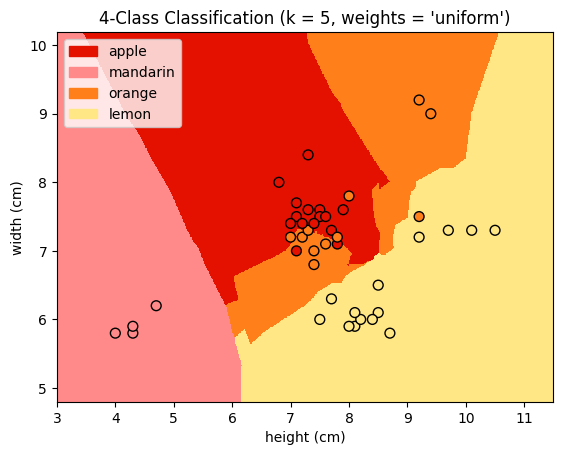

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from sklearn import neighbors

X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = X[['height', 'width']].to_numpy()  
    y_mat = y.to_numpy()

    # Create color maps
    cmap_light = ListedColormap(['#E41100', '#FF8A89', '#FF7F1A', '#FFE785'])
    cmap_bold = ListedColormap(['#E41100', '#FF8A89', '#FF7F1A', '#FFE785'])

    # Initialize and train the KNN classifier
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)

    # Plot decision boundary
    mesh_step_size = .01  # Step size in the mesh
    plot_symbol_size = 50

    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor='black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    patch0 = mpatches.Patch(color='#E41100', label='apple')
    patch1 = mpatches.Patch(color='#FF8A89', label='mandarin')
    patch2 = mpatches.Patch(color='#FF7F1A', label='orange')
    patch3 = mpatches.Patch(color='#FFE785', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])

    plt.xlabel('height (cm)')
    plt.ylabel('width (cm)')
    plt.title("4-Class Classification (k = %i, weights = '%s')" % (n_neighbors, weights))
    plt.show()

plot_fruit_knn(X_train, y_train, 5, 'uniform')

([<matplotlib.axis.XTick at 0x24356600c20>,
 [Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20')])

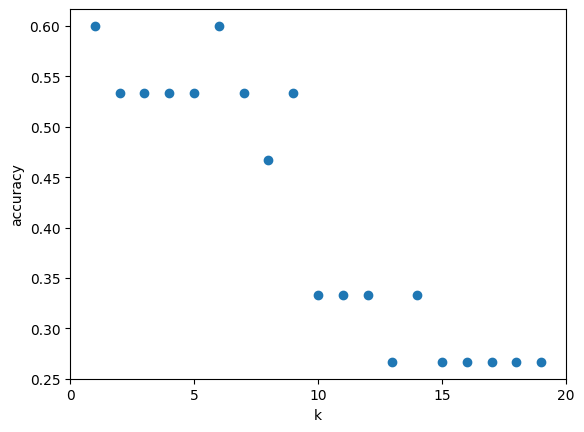

In [65]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])